# Heart Disease Prediction using Machine Learning

Cardiovascular diseases (CVDs) are one of the leading causes of death worldwide. Early detection of heart disease is critical to prevent life-threatening events such as heart attacks and strokes.

In this project, we use patient health data to build a machine learning model that predicts whether a person has heart disease or not. The target variable `heart_disease_present` is binary:
- `0` → No heart disease
- `1` → Heart disease present

The dataset contains 14 columns:
- `patient_id` (unique identifier)
- 13 clinical features such as age, sex, chest pain type, blood pressure, cholesterol, ECG results, exercise-induced angina, etc.

We perform this project in three main tasks:
1. Task 1 – Exploratory Data Analysis (EDA):Understand the data, distributions, patterns, and key risk factors.
2. Task 2 – Model Building & Comparison: Train multiple machine learning models (KNN, Logistic Regression, SVM, Decision Tree, Random Forest, XGBoost) and compare their performance.
3. Task 3 – Hospital Recommendations: Use model insights to provide suggestions for early risk detection and prevention of heart disease.

The final goal is to build a reliable model that can assist hospitals and doctors by flagging high-risk patients for further medical evaluation.


## Problem Statement

Heart disease is a critical medical condition and one of the leading causes of death globally. Early detection and diagnosis can significantly reduce mortality and improve patient outcomes. However, traditional diagnosis methods may be time-consuming and require specialist interpretation.

The objective of this project is to build a machine learning model capable of predicting whether a patient has heart disease based on clinical input features. The target variable in the dataset is **`heart_disease_present`**, where:

- `0` → No heart disease
- `1` → Heart disease present

By analyzing patient data such as age, gender, chest pain type, blood pressure, cholesterol levels, and ECG results, we aim to identify patterns that indicate heart disease risk.

The goal is to:
- Assist healthcare providers in early-stage prediction
- Reduce life-threatening complications through preventive measures
- Support decision-making in hospital environments

Thus, the model serves as a decision-support system that can help prioritize high-risk patients for timely diagnosis and treatment.


## About the Dataset

The dataset used in this project contains clinical information of patients used to detect the presence of heart disease. It consists of **14 columns**, including:

- 1 identifier column
- 13 medical features
- 1 target label (`heart_disease_present`)

Below is a detailed description of each feature:

*
*
*

### Target Label
The model predicts:
- `0` → No heart disease
- `1` → Heart disease present

### Dataset Source
This dataset falls under the Healthcare domain and aims to support early diagnosis in hospital environments.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load datasets
df_values = pd.read_csv(r"C:\Users\sathv\Downloads\PRCP-1016-HeartDieseasePred\Data\values.csv")
df_labels = pd.read_csv(r"C:\Users\sathv\Downloads\PRCP-1016-HeartDieseasePred\Data\labels.csv")
# Merge on patient_id
df = pd.merge(df_values, df_labels, on="patient_id")
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [29]:
dataset_info = pd.DataFrame({
    "Feature": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": [df[col].nunique() for col in df.columns]
})

dataset_info


,Feature,Data Type,Missing Values,Unique Values
0,patient_id,object,0,180
1,slope_of_peak_exercise_st_segment,int64,0,3
2,thal,object,0,3
3,resting_blood_pressure,int64,0,36
4,chest_pain_type,int64,0,4
5,num_major_vessels,int64,0,4
6,fasting_blood_sugar_gt_120_mg_per_dl,int64,0,2
7,resting_ekg_results,int64,0,3
8,serum_cholesterol_mg_per_dl,int64,0,118
9,oldpeak_eq_st_depression,float64,0,34


### Importing Libraries

We imported the following libraries required for our project:
- NumPy, Pandas → For handling and analyzing data
- Matplotlib, Seaborn → For visualizing patterns, graphs, and feature distributions
- Scikit-learn → To build and evaluate different machine learning models such as:
  - K-Nearest Neighbors (KNN)
  - Logistic Regression
  - Support Vector Machine (SVM)
  - Decision Tree Classifier
  - Random Forest Classifier
- XGBoost → Boosting-based classifier for improved performance
- StandardScaler → To scale/standardize numeric features
- Train-Test Split → To divide data into training and testing sets
- Evaluation Metrics → To measure model performance (Accuracy, F1-score, Confusion Matrix)

These libraries support data preprocessing, model training, evaluation, and visualization throughout the project.


In [30]:
df.shape

(180, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [32]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [33]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [34]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
num_cols = [
    'age',
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'max_heart_rate_achieved',
    'oldpeak_eq_st_depression',
    'slope_of_peak_exercise_st_segment',
    'num_major_vessels'
]

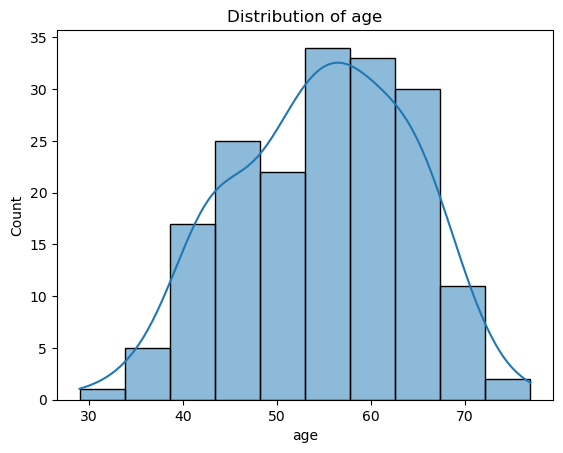

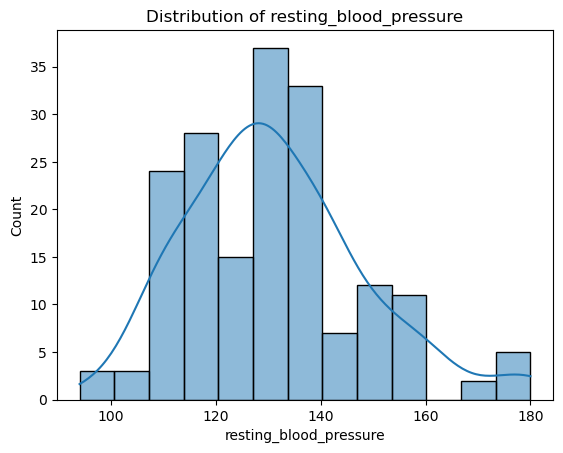

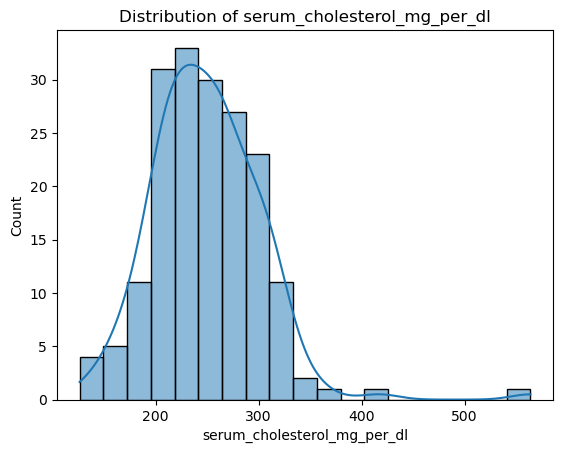

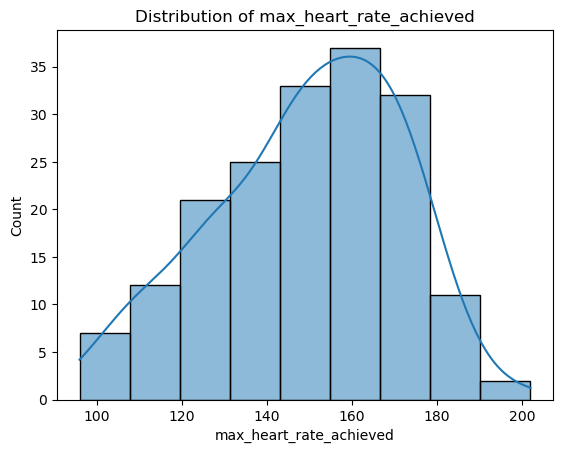

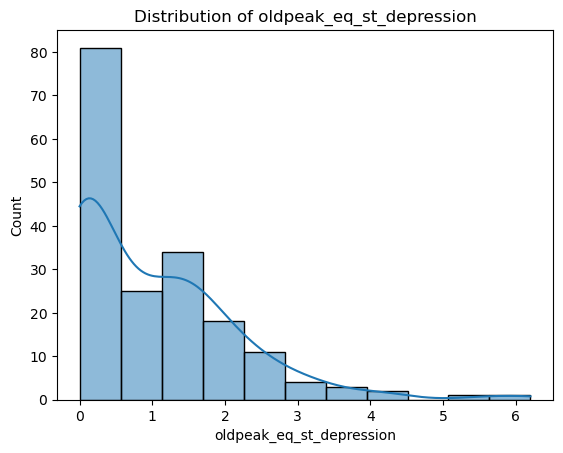

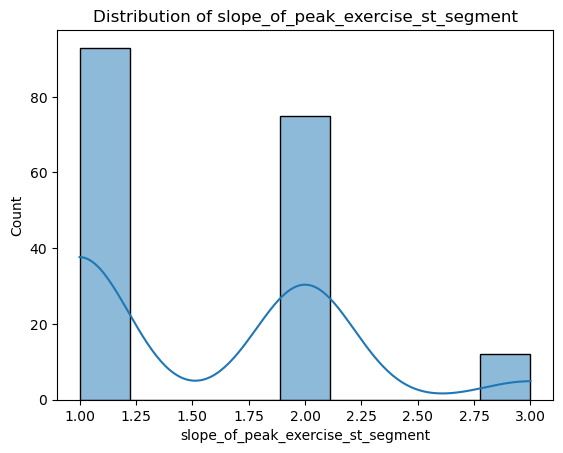

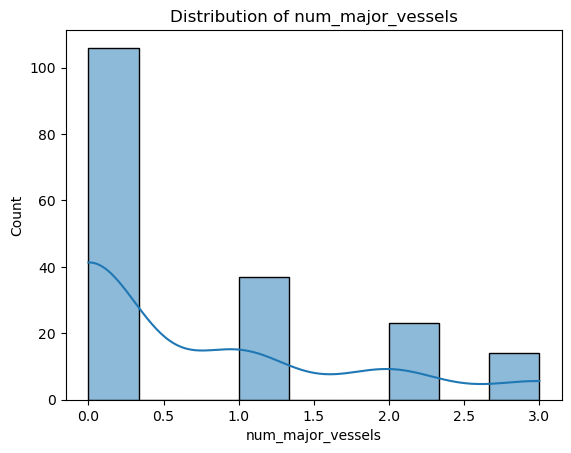

In [37]:
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


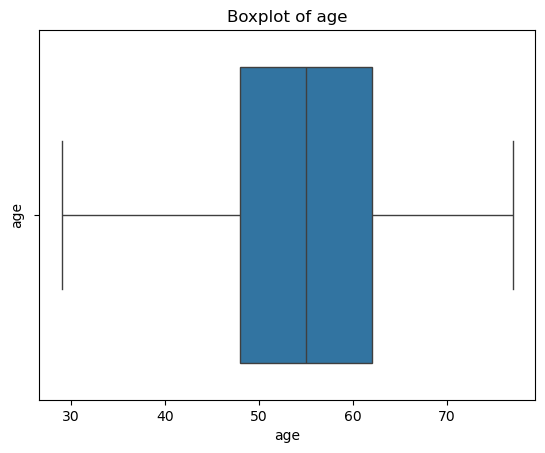

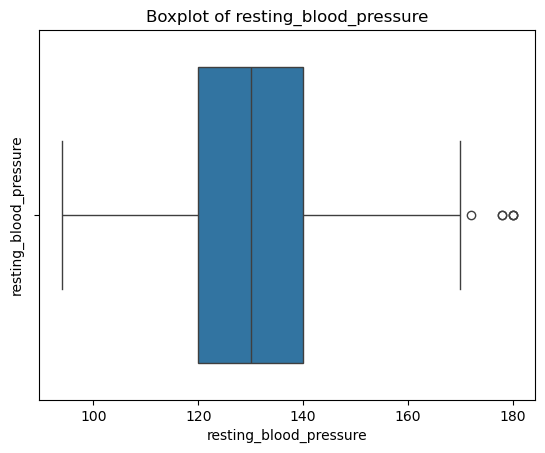

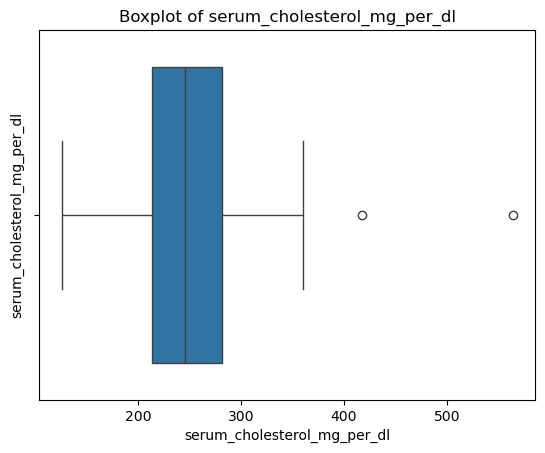

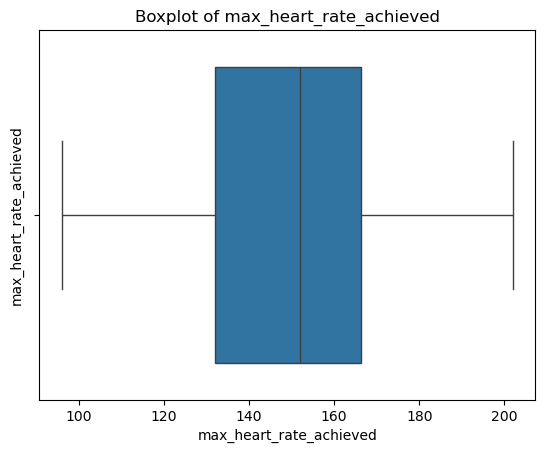

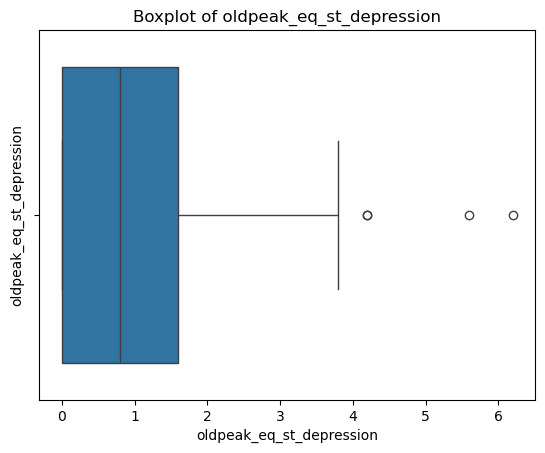

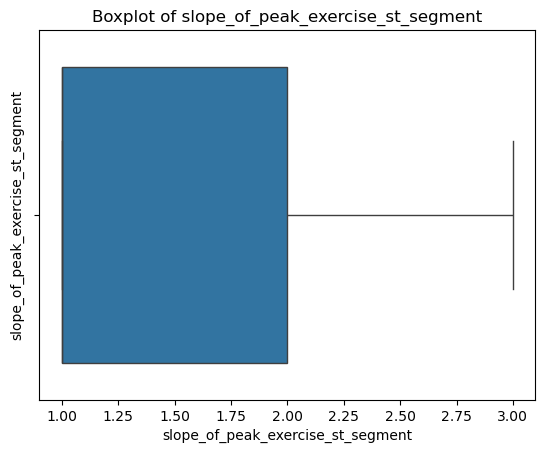

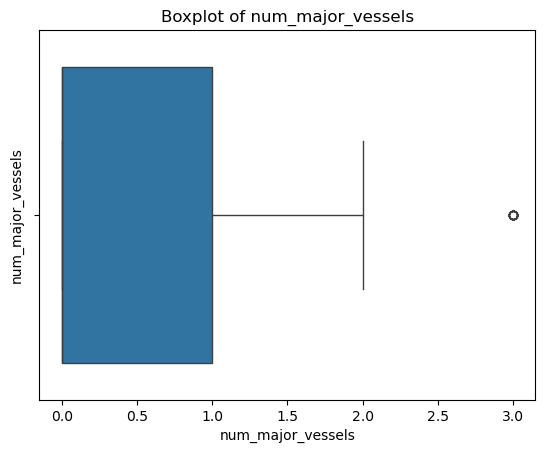

In [38]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


In [39]:
cat_cols = [
    'sex',
    'chest_pain_type',
    'thal',
    'resting_ekg_results',
    'fasting_blood_sugar_gt_120_mg_per_dl',
    'exercise_induced_angina',
]

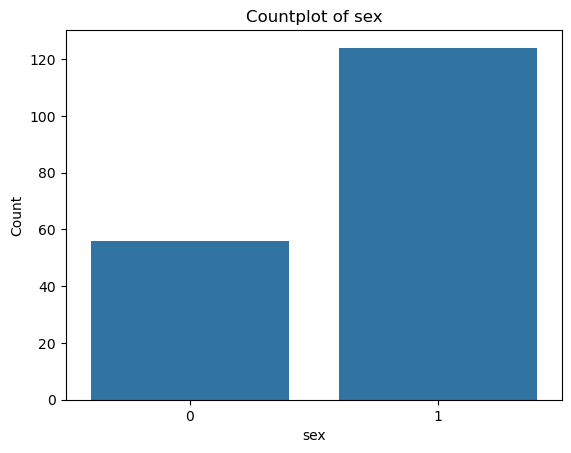

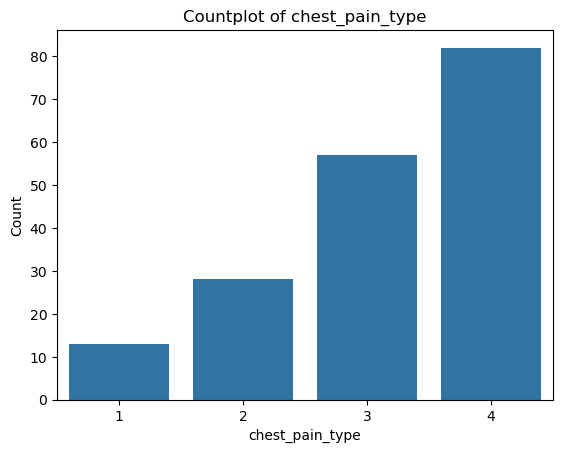

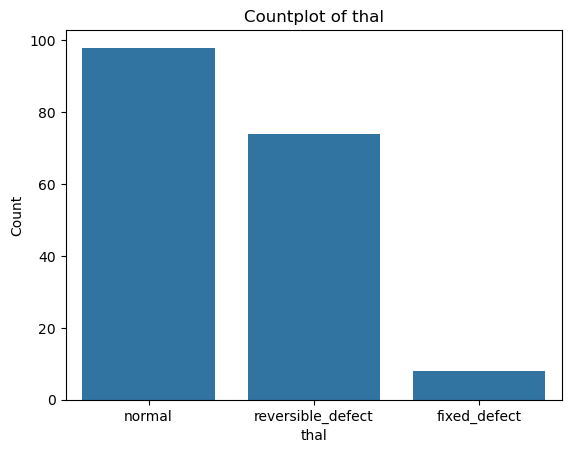

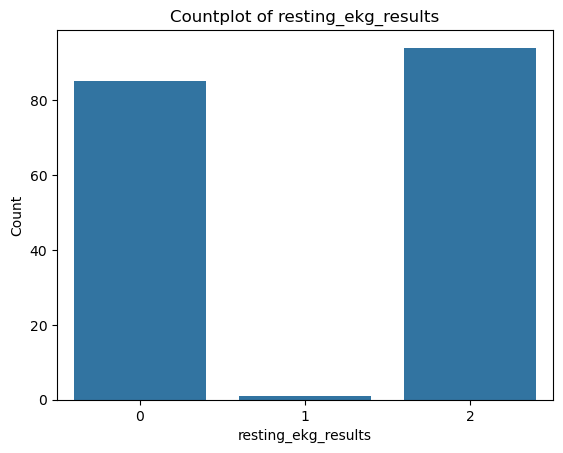

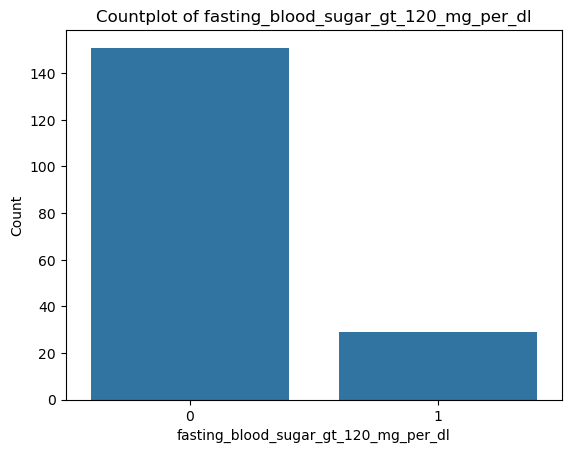

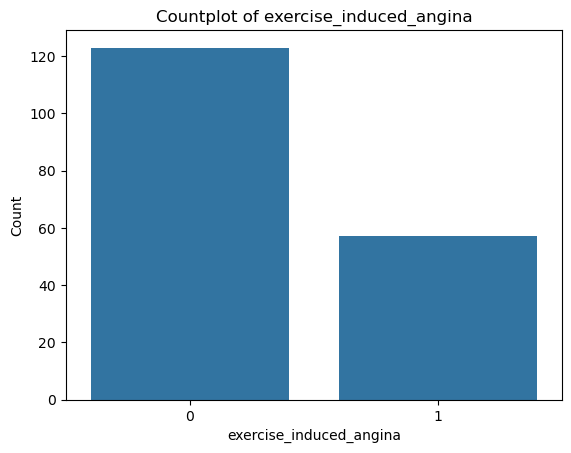

In [40]:
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


<Axes: xlabel='sex', ylabel='count'>

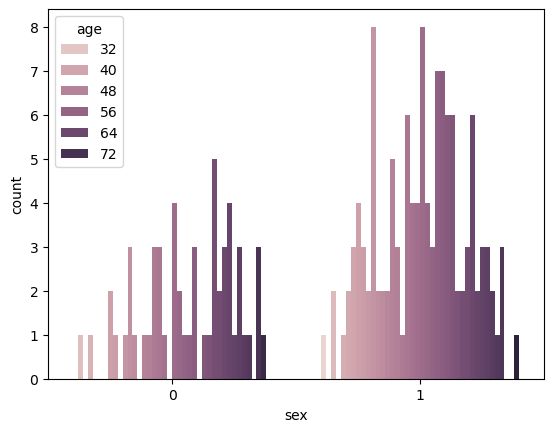

In [41]:
sns.countplot(x='sex', hue='age', data=df)


In [42]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [44]:
en = df[["thal"]]
en

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


In [45]:
pd.get_dummies(en)

,thal_fixed_defect,thal_normal,thal_reversible_defect
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
175,False,False,True
176,False,True,False
177,False,False,True
178,False,True,False


In [46]:
pd.get_dummies(en).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   thal_fixed_defect       180 non-null    bool 
 1   thal_normal             180 non-null    bool 
 2   thal_reversible_defect  180 non-null    bool 
dtypes: bool(3)
memory usage: 672.0 bytes


In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ar = ohe.fit_transform(en).toarray()
ar

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [48]:
df = df.drop('thal', axis=1)

thal_df = pd.DataFrame(ar, columns=["thal_fixed_defect", "thal_normal", "thal_reversible_defect"])

df = pd.concat([df, thal_df], axis=1)
df.head()
df.columns


Index(['patient_id', 'slope_of_peak_exercise_st_segment',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_fixed_defect', 'thal_normal',
       'thal_reversible_defect'],
      dtype='object')

In [49]:
y = df['heart_disease_present']
x = df.drop(['heart_disease_present', 'patient_id'], axis=1)

In [50]:
x

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0.0,1.0,0.0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0.0,1.0,0.0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,0.0,1.0,0.0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,0.0,0.0,1.0
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,0.0,0.0,1.0
176,2,180,4,0,0,1,327,3.4,0,55,117,1,0.0,1.0,0.0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,0.0,0.0,1.0
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0.0,1.0,0.0


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'age',
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'max_heart_rate_achieved',
    'oldpeak_eq_st_depression'
]

scaler = StandardScaler()

# Fit on training data only
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

# Transform test data
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [53]:
x_train

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
117,1,-1.261680,4,0,0,2,-1.583965,-0.868275,1,-1.562503,0.377275,0,0.0,0.0,1.0
65,1,-0.321541,4,0,0,2,0.757613,-0.868275,1,-2.231152,0.286426,1,0.0,0.0,1.0
67,2,-0.967886,4,0,0,0,1.204642,0.216598,1,-1.339620,1.422036,0,0.0,1.0,0.0
31,2,1.088668,4,3,0,2,-0.455750,0.035786,0,1.112094,-1.621399,0,0.0,0.0,1.0
12,1,0.501081,3,0,0,0,1.885828,-0.868275,1,1.000652,0.377275,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,-1.144162,4,0,0,0,-0.902779,-0.777869,1,-0.893854,-0.304091,0,0.0,1.0,0.0
106,1,1.088668,3,0,0,2,-0.306741,0.578222,1,-0.113763,0.695246,0,0.0,0.0,1.0
14,2,-0.674093,1,0,0,0,-0.328028,2.567155,1,-1.896828,1.467460,1,0.0,0.0,1.0
92,1,0.207288,3,0,1,0,1.225929,-0.868275,0,-0.113763,0.922368,0,0.0,1.0,0.0


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)

In [56]:
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [57]:
knn.score(x_test,y_test)*100

86.11111111111111

In [58]:
knn.score(x_train,y_train)*100

86.80555555555556

In [59]:
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 100.0 75.0
2 85.41666666666666 75.0
3 90.27777777777779 80.55555555555556
4 84.02777777777779 80.55555555555556
5 86.11111111111111 80.55555555555556
6 83.33333333333334 75.0
7 86.80555555555556 86.11111111111111
8 85.41666666666666 77.77777777777779
9 85.41666666666666 83.33333333333334
10 86.11111111111111 77.77777777777779
11 85.41666666666666 83.33333333333334
12 82.63888888888889 80.55555555555556
13 81.94444444444444 80.55555555555556
14 82.63888888888889 77.77777777777779
15 82.63888888888889 77.77777777777779
16 82.63888888888889 75.0
17 82.63888888888889 75.0
18 83.33333333333334 75.0
19 84.02777777777779 75.0
20 83.33333333333334 75.0
21 82.63888888888889 77.77777777777779
22 81.25 77.77777777777779
23 81.25 77.77777777777779
24 81.25 77.77777777777779
25 81.25 77.77777777777779
26 81.25 77.77777777777779
27 81.25 77.77777777777779
28 80.55555555555556 75.0
29 80.55555555555556 75.0


In [60]:
y_pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  0]
 [ 5 15]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

knn_accuracy = report['accuracy']   # ✅ accuracy is defined here
print("Accuracy:", knn_accuracy)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

Accuracy: 0.8611111111111112


# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [66]:
y_train_pred = log_model.predict(x_train)

In [67]:
y_test_pred = log_model.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [69]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred)*100)

Train Accuracy: 86.11111111111111


In [70]:
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred)*100)

Test  Accuracy: 83.33333333333334


In [71]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[15  1]
 [ 5 15]]


In [72]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [73]:
from sklearn.metrics import classification_report, accuracy_score

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

lr_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", lr_accuracy)



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

Accuracy: 0.8333333333333334


# Decision Tree and SVM

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [76]:
y_pred_dt = dt.predict(x_test)

In [77]:
print("\n Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


 Decision Tree Results
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



In [78]:
from sklearn.metrics import classification_report

print("\nDecision Tree Results")

report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

accuracy_dt = report_dt['accuracy']
print("Accuracy (from classification report):", accuracy_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Results
Accuracy (from classification report): 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



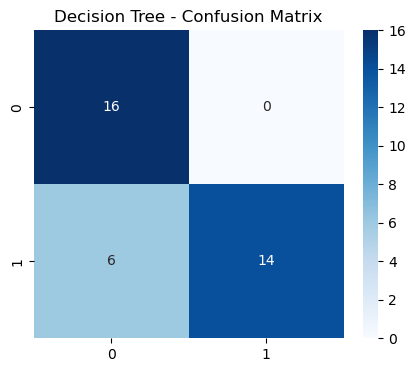

In [79]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [80]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [81]:
y_pred_svm = svm_model.predict(x_test)

In [82]:
print("\n SVM Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


 SVM Model Results
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



In [83]:
from sklearn.metrics import classification_report

print("\nSVM Model Results")

report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

accuracy_svm = report_svm['accuracy']
print("Accuracy (extracted from classification report):", accuracy_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Model Results
Accuracy (extracted from classification report): 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



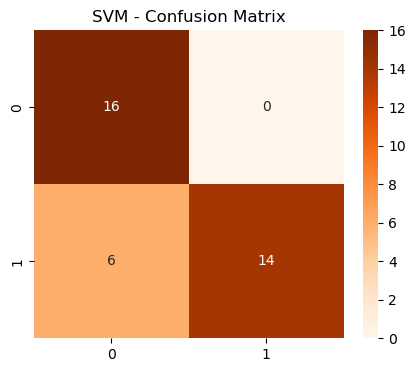

In [84]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Oranges")
plt.title("SVM - Confusion Matrix")
plt.show()

In [85]:
x_train

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
117,1,-1.261680,4,0,0,2,-1.583965,-0.868275,1,-1.562503,0.377275,0,0.0,0.0,1.0
65,1,-0.321541,4,0,0,2,0.757613,-0.868275,1,-2.231152,0.286426,1,0.0,0.0,1.0
67,2,-0.967886,4,0,0,0,1.204642,0.216598,1,-1.339620,1.422036,0,0.0,1.0,0.0
31,2,1.088668,4,3,0,2,-0.455750,0.035786,0,1.112094,-1.621399,0,0.0,0.0,1.0
12,1,0.501081,3,0,0,0,1.885828,-0.868275,1,1.000652,0.377275,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,-1.144162,4,0,0,0,-0.902779,-0.777869,1,-0.893854,-0.304091,0,0.0,1.0,0.0
106,1,1.088668,3,0,0,2,-0.306741,0.578222,1,-0.113763,0.695246,0,0.0,0.0,1.0
14,2,-0.674093,1,0,0,0,-0.328028,2.567155,1,-1.896828,1.467460,1,0.0,0.0,1.0
92,1,0.207288,3,0,1,0,1.225929,-0.868275,0,-0.113763,0.922368,0,0.0,1.0,0.0


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# XGBOOST

In [62]:
pip install xgboost


     -------------------------------------- 72.0/72.0 MB 534.9 kB/s eta 0:00:00


In [87]:
from xgboost import XGBClassifier

In [88]:
xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.05,     # step size
    max_depth=4,            # depth of each tree
    subsample=0.8,          # % of rows used per tree
    colsample_bytree=0.8,   # % of columns used per tree
    random_state=42,
    eval_metric="logloss",  # avoids warning
    use_label_encoder=False # avoids label encoder warning
)

In [89]:
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")

In [90]:
xgb_model.fit(x_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [91]:
y_pred = xgb_model.predict(x_test)

In [92]:
y_proba = xgb_model.predict_proba(x_test)[:, 1]  # probability of class 1

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred)*100)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 83.33333333333334

Confusion Matrix:
 [[15  5]
 [ 1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



ROC-AUC Score: 0.9343750000000001


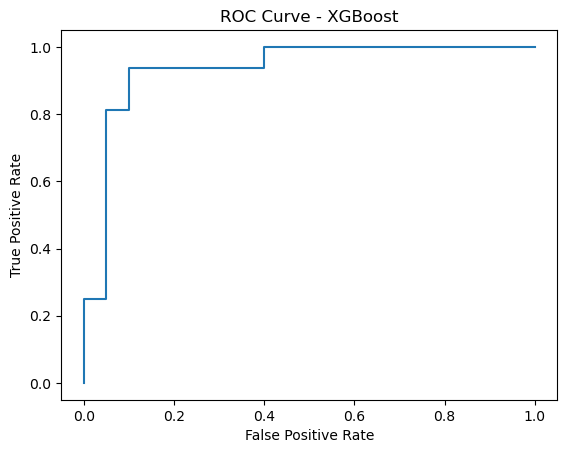

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.show()

thal_normal                             0.253891
chest_pain_type                         0.132900
exercise_induced_angina                 0.104890
fasting_blood_sugar_gt_120_mg_per_dl    0.092077
thal_reversible_defect                  0.077342
sex                                     0.054001
num_major_vessels                       0.050207
resting_blood_pressure                  0.048785
oldpeak_eq_st_depression                0.045269
age                                     0.043075
serum_cholesterol_mg_per_dl             0.028107
resting_ekg_results                     0.027021
max_heart_rate_achieved                 0.023351
slope_of_peak_exercise_st_segment       0.019083
thal_fixed_defect                       0.000000
dtype: float32


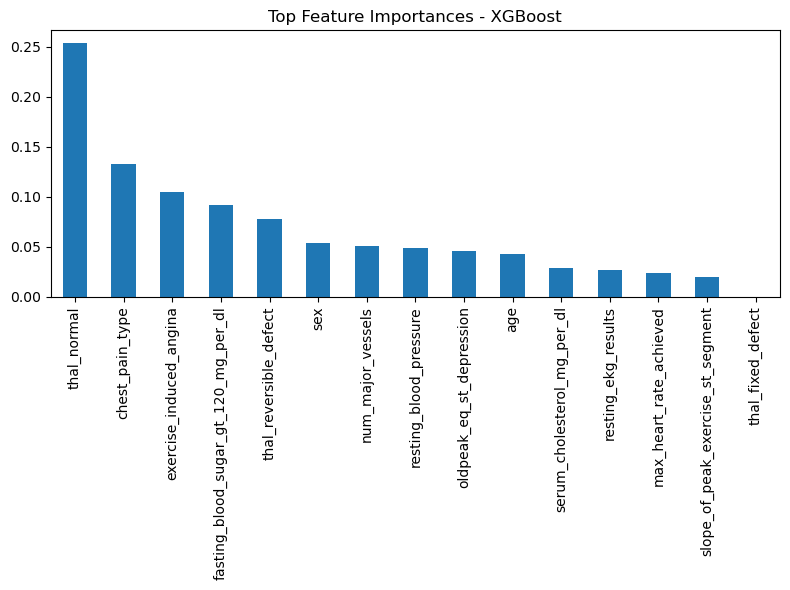

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb_model.feature_importances_
feat_imp = pd.Series(importance, index=x.columns).sort_values(ascending=False)

print(feat_imp)

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='bar')
plt.title("Top Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

Accuracy: 0.8611111111111112

Confusion Matrix:
 [[16  4]
 [ 1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36


ROC-AUC Score: 0.953125


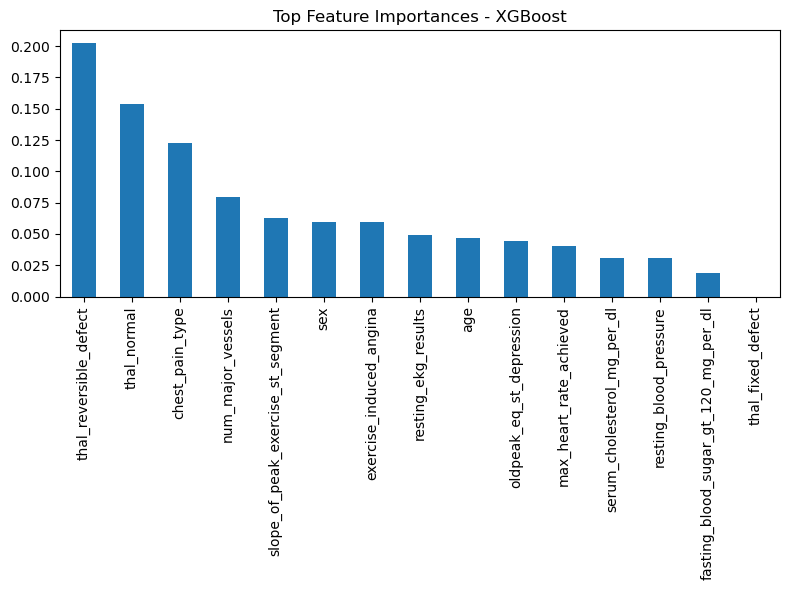

In [96]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# 1. Train–test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Define model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)

# 3. Train
xgb_model.fit(x_train, y_train)

# 4. Predict
y_pred = xgb_model.predict(x_test)
y_proba = xgb_model.predict_proba(x_test)[:, 1]

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

# 6. Feature Importance
importance = xgb_model.feature_importances_
feat_imp = pd.Series(importance, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='bar')
plt.title("Top Feature Importances - XGBoost")
plt.tight_layout()
plt.show()


In [97]:
from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_model.predict(x_test)))

XGBoost Accuracy: 0.8611111111111112


In [98]:
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(x_test))
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.8611111111111112


# Random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [100]:
y_pred_rf = rf_model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8888888888888888


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[16  4]
 [ 0 16]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



In [103]:
rf_accuracy = accuracy_score(y_test, rf_model.predict(x_test))
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8888888888888888


In [104]:
print("\n==============================")
print("MODEL ACCURACY COMPARISON")
print("==============================")
print("XGBoost Accuracy      :", xgb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

if xgb_accuracy > rf_accuracy:
    print("XGBoost performed better")
elif rf_accuracy > xgb_accuracy:
    print("Random Forest performed better")
else:
    print("Both models performed equally")


MODEL ACCURACY COMPARISON
XGBoost Accuracy      : 0.8611111111111112
Random Forest Accuracy: 0.8888888888888888
Random Forest performed better


In [105]:
accuracy = [lr_accuracy,accuracy_svm,knn_accuracy,accuracy_dt,rf_accuracy,xgb_accuracy]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(accuracy[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8333333333333334 %
The accuracy score achieved using Support Vector Machine is: 0.8333333333333334 %
The accuracy score achieved using K-Nearest Neighbors is: 0.8611111111111112 %
The accuracy score achieved using Decision Tree is: 0.8333333333333334 %
The accuracy score achieved using Random Forest is: 0.8888888888888888 %
The accuracy score achieved using XGBoost is: 0.8611111111111112 %


In [106]:
print("\n==============================")
print("MODEL ACCURACY COMPARISON")
print("==============================")

accuracy = [
    lr_accuracy,
    accuracy_svm,
    knn_accuracy,
    accuracy_dt,
    rf_accuracy,
    xgb_accuracy
]

algorithms = [
    "Logistic Regression",
    "Support Vector Machine",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "XGBoost"
]

for i in range(len(algorithms)):
    print("The accuracy score achieved using", algorithms[i], "is:", round(accuracy[i] * 100, 2), "%")

best_accuracy = max(accuracy)
best_index = accuracy.index(best_accuracy)
best_model = algorithms[best_index]

print("\nBEST PERFORMING MODEL:")
print(best_model, "with Accuracy:", round(best_accuracy * 100, 2), "%")



MODEL ACCURACY COMPARISON
The accuracy score achieved using Logistic Regression is: 83.33 %
The accuracy score achieved using Support Vector Machine is: 83.33 %
The accuracy score achieved using K-Nearest Neighbors is: 86.11 %
The accuracy score achieved using Decision Tree is: 83.33 %
The accuracy score achieved using Random Forest is: 88.89 %
The accuracy score achieved using XGBoost is: 86.11 %

BEST PERFORMING MODEL:
Random Forest with Accuracy: 88.89 %


#Among all six classification models evaluated, Random Forest achieved the maximum accuracy, indicating its robustness and reliability for this dataset.

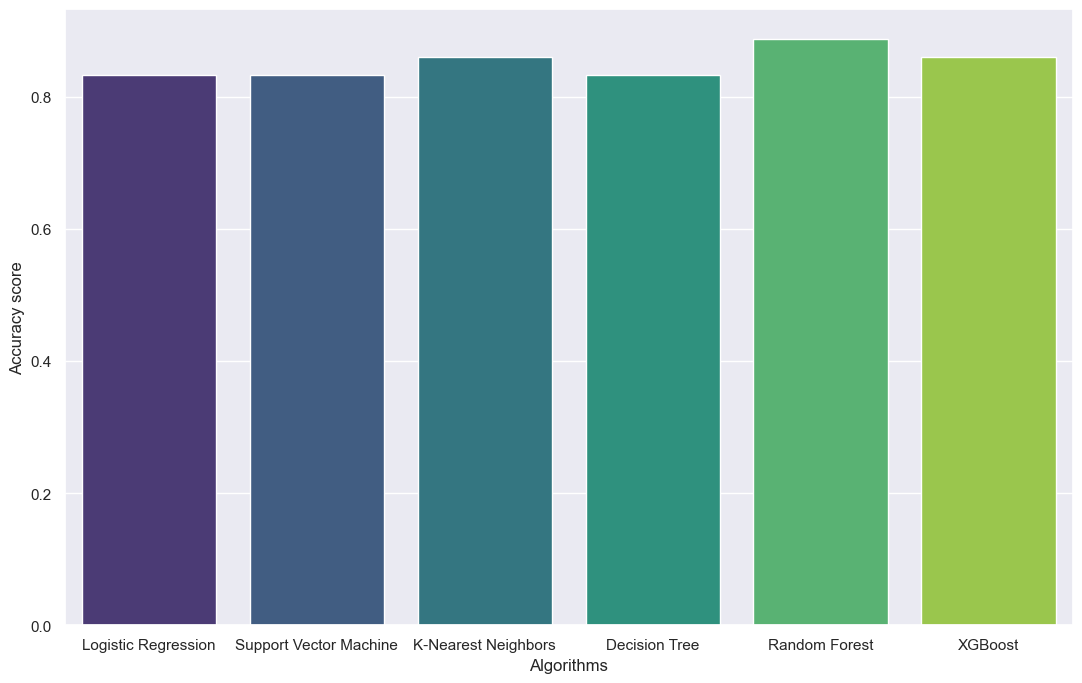

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (13, 8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=accuracy, palette='viridis')
plt.show()


# Model Comparison Report – Heart Disease Prediction

**1.Evaluated Models**

The following machine-learning algorithms were trained and tested on the heart-disease dataset:

*Logistic Regression

*Support Vector Machine (SVM)

*K-Nearest Neighbors (KNN)

*Decision Tree

*Random Forest

*XGBoost (Gradient Boosting)


**2.Model-wise Accuracy Results**

| Model                  |    Accuracy |
| ---------------------- | ----------: |
| Logistic Regression    |     83.33 % |
| Support Vector Machine |     83.33 % |
| K-Nearest Neighbors    |     86.11 % |
| Decision Tree          |     83.33 % |
| **Random Forest**      | **88.89 %** |
| XGBoost                |     86.11 % |


**3.Performance Interpretation**

a) Logistic Regression (83.33 %)

     *Performs reasonably well

     *Linear model assumptions may limit predictive accuracy

b) Support Vector Machine (83.33 %)

     *Performs similar to Logistic Regression

     *Requires tuning kernel and parameters to improve

c) K-Nearest Neighbors (86.11 %)

     *Shows improvement by capturing non-linear relationships

     *Sensitive to feature scaling and noise

d) Decision Tree (83.33 %)

     *Simple model but prone to overfitting

     *Accuracy not competitive without ensemble methods

e) **Random Forest (88.89 % — Best)**

     *Achieved highest accuracy

     *Ensemble of trees improves generalization

     *Handles feature interactions better than simpler models

f) XGBoost (86.11 %)

     *Strong boosting model

     *Competitive performance

      *May need parameter tuning to reach full performance

**4.Best Model Recommendation**

Based on accuracy,

⭐ **Random Forest** achieved the highest accuracy (88.89%) and is recommended for production.

**5.Reason for Recommendation**

Random Forest should be preferred because:

   *It reduces overfitting via multiple trees

   *Works well on small-to-medium tabular medical datasets

   *Gives stable accuracy without heavy tuning

   *Interpretability can be achieved using feature importance

# Challenges Faced in the Heart Disease Dataset

**1. Data Imbalance**

Some classes (heart disease = 0 or 1) were slightly imbalanced which can affect model learning.

*Technique Used

✔ Train–test split with stratification
✔ Performance evaluated using accuracy and confusion matrix

*Reason

To ensure both classes are fairly represented while training.

**2. Outliers in Numeric Features**

Features like cholesterol, resting BP & max heart rate contained extreme values.

*Technique Used

✔ StandardScaler (for scaling)

*Reason

Scaling reduced the effect of large values and helped distance-based models (KNN, SVM).

**3. Different Scale of Variables**

Some attributes had different numeric scales which negatively impact algorithms like KNN & SVM.

*Technique Used

✔ Normalization / Standardization

*Reason

Ensures equal weight for all features, improves classification performance.

**4. Model Overfitting (Tree Models)**

Decision Tree showed more variance and unstable predictions.

*Technique Used

✔ Random Forest
✔ XGBoost

*Reason

Ensemble methods reduce overfitting by combining multiple weak learners.

**5. Feature Correlation**

Some features (e.g., age, oldpeak, max heart rate) show correlations.

*Technique Used

✔ Feature importance analysis
✔ Regularization via Logistic Regression

*Reason

To ensure highly correlated variables don’t cause model bias.

In [96]:
#task 3 

# Suggestions to the Hospital to Improve Heart-Disease Prediction & Prevent Life Threats

**1. Implement an Early-Screening Prediction System**

Use the developed Machine Learning model (preferably Random Forest) inside hospital workflow to:

-Screen incoming patients automatically

-Identify high-risk individuals based on medical parameters

-Prioritize further diagnosis such as ECG, TMT and echo

Expected Benefit

✔ early detection
✔ fewer sudden emergencies
✔ better clinical decision support

**2. Periodic Monitoring of High-Risk Patients**

From dataset features, age, cholesterol, chest pain type, blood pressure and max heart rate highly influence prediction—such patients should receive:

-regular health checkups

-preventive consultation

-medication guidance

Expected Benefit

✔ reduces severe complications
✔ avoids emergency admissions

**3. Integrate Patient Medical Records with ML Dashboard**

Hospital must adopt digital health record systems capturing:

-BP

-Cholesterol

-Diabetes history

-ECG and angina symptoms

Expected Benefit

✔ reduces manual diagnosis errors
✔ data-driven decision making

**4. Awareness & Health Education Programs**

The dataset proves most conditions (BP, cholesterol, angina) are lifestyle driven. Therefore:

-conduct awareness sessions

-educate on diet control

-promote physical activity

-smoking & alcohol reduction counselling

Expected Benefit

✔ prevention instead of treatment
✔ improves patient responsibility

**5. Build Preventive Action Plans**

For identified high-risk patients, hospital should implement:

-customized diet plan

-hypertension management

-diabetes control plan

-cardiology follow-ups every 3–6 months

Expected Result

✔ reduces heart attack probability
✔ better survival outcomes

**6. Use Machine Learning Model for Clinical Alerts**

When patient values cross clinical limits (BP, cholesterol etc.), ML System should trigger:

-automatic warning alerts

-recommendation for cardiology appointment

Expected Benefit

✔ prevents silent disease progression

 # **Final Suggestion**

Hospital should adopt a Random Forest-based early prediction system combined with routine monitoring, lifestyle counselling and continuous digital data recording.

This will help:

-prevent heart attacks

-reduce mortality

-protect at-risk population

-support better hospital decision making